In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
plt.rcParams['figure.figsize'] = [12, 4]

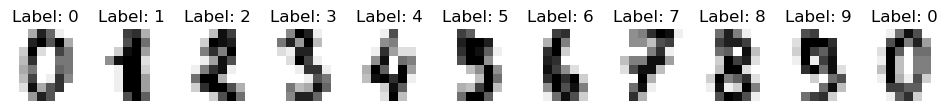

In [43]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# load the digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 11 images.
_, axes = plt.subplots(1, 11)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:11]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)

In [44]:
np.random.seed(0)

# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
data = digits.images.reshape((len(digits.images), -1))

# Split data into train and test subsets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, digits.target, test_size=0.5, shuffle=False)

print('Total images:', len(digits.images))
print('Training set:', len(X_train))
print('Testing set', len(X_test))

Total images: 1797
Training set: 898
Testing set 899


In [45]:
# create a neural network classifier
classifier = MLPClassifier(alpha=1e-3)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now we predict the value of the digits on the second half:
predicted = classifier.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

# compute the testing accuracy
accuracy = accuracy_score(y_test, predicted)
print("Testing accuracy:", accuracy)

Testing accuracy: 0.9243604004449388


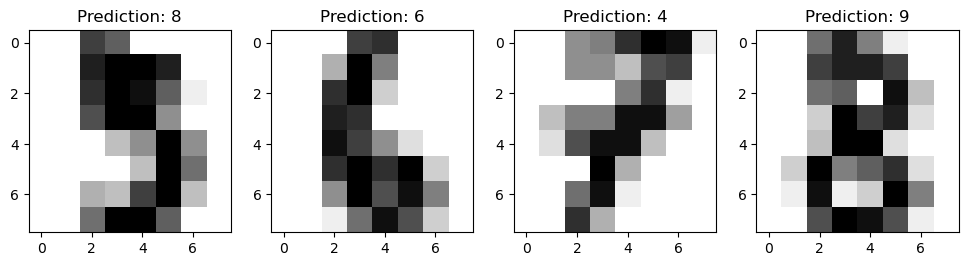

In [47]:
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[10 // 2:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

We can conclude that MLP is not too accurate in predicting the handwritten digits in images.